In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import statsmodels
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess

#from patsy import dmatrices
from sklearn import datasets, svm

In [59]:
df = pd.read_csv("data/train.csv") 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
print(df.Survived.value_counts())
print(df.Pclass.value_counts())
print(df.Sex.value_counts())
print(df.Survived.value_counts())

0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
0    549
1    342
Name: Survived, dtype: int64


In [4]:
print('Number of missing values : ', df.isnull().sum())

Number of missing values :  PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
type(df.Survived)

pandas.core.series.Series

In [9]:
new = df["Name"].str.split(" ", n = 1, expand = True)

In [10]:
df["Last Name"]= new[0]
df["First Name"]= new[1]

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name,First Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"Braund,",Mr. Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"Cumings,",Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"Heikkinen,",Miss. Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"Futrelle,",Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"Allen,",Mr. William Henry


In [11]:
df.sort_values(by="Fare").head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name,First Name
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,"Tornquist,",Mr. William Henry
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,"Johnson,",Mr. Alfred
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,"Johnson,",Mr. William Cahoone Jr
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,"Parr,",Mr. William Henry Marsh
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,"Parkes,","Mr. Francis ""Frank"""
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,"Cunningham,",Mr. Alfred Fleming
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0,NaN,S,"Watson,",Mr. Ennis Hastings
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,"Harrison,",Mr. William
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,"Campbell,",Mr. William
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0,NaN,S,"Knight,",Mr. Robert J


In [12]:
df[["Survived","Pclass","Fare"]].head()

,Survived,Pclass,Fare
0,0,3,7.2500
1,1,1,71.2833
2,1,3,7.9250
3,1,1,53.1000
4,0,3,8.0500


In [13]:
df[df['Sex'] == 'female'].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name,First Name
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"Cumings,",Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"Heikkinen,",Miss. Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"Futrelle,",Mrs. Jacques Heath (Lily May Peel)
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,"Johnson,",Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,"Nasser,",Mrs. Nicholas (Adele Achem)


In [14]:
is_female = df['Sex'] == 'female'
is_female.value_counts()

False    577
True     314
Name: Sex, dtype: int64

In [15]:
df[(df['Sex'] == 'female') & (df['Survived'] == 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name,First Name
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"Cumings,",Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"Heikkinen,",Miss. Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"Futrelle,",Mrs. Jacques Heath (Lily May Peel)
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,"Johnson,",Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,"Nasser,",Mrs. Nicholas (Adele Achem)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C,"Abelson,",Mrs. Samuel (Hannah Wizosky)
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C,"Najib,","Miss. Adele Kiamie ""Jane"""
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,"Potter,",Mrs. Thomas Jr (Lily Alexenia Wilson)
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S,"Shelley,",Mrs. William (Imanita Parrish Hall)


In [16]:
df[(df['Sex'] == 'female') & (df['Survived'] == 1) & (df['Age'] > 50)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name,First Name
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,"Bonnell,",Miss. Elizabeth
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,"Hewlett,",Mrs. (Mary D Kingcome)
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,"Lurette,",Miss. Elise
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S,"Graham,",Mrs. William Thompson (Edith Junkins)
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,"Andrews,",Miss. Kornelia Theodosia
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C,"Warren,",Mrs. Frank Manley (Anna Sophia Atkinson)
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S,"Turkula,",Mrs. (Hedwig)
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C,"Eustis,",Miss. Elizabeth Mussey
513,514,1,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",female,54.0,1,0,PC 17603,59.4000,NaN,C,"Rothschild,",Mrs. Martin (Elizabeth L. Barrett)
571,572,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,"Appleton,",Mrs. Edward Dale (Charlotte Lamson)


In [18]:
df[(df['Survived'] == 1) & (df['Age'] > 50)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name,First Name
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,"Bonnell,",Miss. Elizabeth
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,"Hewlett,",Mrs. (Mary D Kingcome)
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,"Lurette,",Miss. Elise
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S,"Graham,",Mrs. William Thompson (Edith Junkins)
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,"Andrews,",Miss. Kornelia Theodosia
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C,"Warren,",Mrs. Frank Manley (Anna Sophia Atkinson)
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S,"Peuchen,",Major. Arthur Godfrey
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S,"Turkula,",Mrs. (Hedwig)
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C,"Eustis,",Miss. Elizabeth Mussey
513,514,1,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",female,54.0,1,0,PC 17603,59.4000,NaN,C,"Rothschild,",Mrs. Martin (Elizabeth L. Barrett)


In [19]:
df[df['Age'].isna()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name,First Name
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,"Moran,",Mr. James
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,"Williams,",Mr. Charles Eugene
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,"Masselmani,",Mrs. Fatima
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,"Emir,",Mr. Farred Chehab
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,"O'Dwyer,","Miss. Ellen ""Nellie"""


In [20]:
df[df['Age'].notna()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name,First Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"Braund,",Mr. Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"Cumings,",Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"Heikkinen,",Miss. Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"Futrelle,",Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"Allen,",Mr. William Henry


In [21]:
df.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

In [22]:
df.groupby('Sex').count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name,First Name
Sex,,,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312,314,314
male,577,577,577,577,453,577,577,577,577,107,577,577,577


In [23]:
df.groupby('Pclass')['Survived'].count()

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

In [24]:
df.groupby('Pclass').agg({'Fare': np.mean, 'Pclass': np.size})

,Fare,Pclass
Pclass,,
1,84.154687,216
2,20.662183,184
3,13.675550,491


In [25]:
df.groupby(['Pclass', 'Survived', 'Sex']).agg({'Age': [np.size, np.mean]})

Age           
                         size       mean
Pclass Survived Sex                     
1      0        female    3.0  25.666667
                male     77.0  44.581967
       1        female   91.0  34.939024
                male     45.0  36.248000
2      0        female    6.0  36.000000
                male     91.0  33.369048
       1        female   70.0  28.080882
                male     17.0  16.022000
3      0        female   72.0  23.818182
                male    300.0  27.255814
       1        female   72.0  19.329787
                male     47.0  22.274211

In [26]:
df.groupby(['Pclass','Survived'])['Fare'].mean()

Pclass  Survived
1       0           64.684008
        1           95.608029
2       0           19.412328
        1           22.055700
3       0           13.669364
        1           13.694887
Name: Fare, dtype: float64

In [27]:
(df.assign(rn=df.sort_values(['Fare'], ascending=False) 
             .groupby(['Pclass']) 
             .cumcount() + 1)
 .query('rn < 4')
 .sort_values(['Pclass', 'rn']))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name,First Name,rn
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,"Ward,",Miss. Anna,1
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,"Lesurer,",Mr. Gustave J,2
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,"Cardeza,",Mr. Thomas Drake Martinez,3
655,656,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.5000,NaN,S,"Hickman,",Mr. Leonard Mark,1
385,386,0,2,"Davies, Mr. Charles Henry",male,18.0,0,0,S.O.C. 14879,73.5000,NaN,S,"Davies,",Mr. Charles Henry,2
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5000,NaN,S,"Hood,",Mr. Ambrose Jr,3
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,"Sage,","Miss. Dorothy Edith ""Dolly""",1
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,NaN,S,"Sage,",Mr. George John Jr,2
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S,"Sage,",Miss. Constance Gladys,3


In [28]:
(df.assign(rnk=df.groupby(['Pclass'])['Fare']
             .rank(method='first', ascending=False))
 .query('rnk < 4')
 .sort_values(['Pclass', 'Fare']))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name,First Name,rnk
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,"Ward,",Miss. Anna,1.0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,"Cardeza,",Mr. Thomas Drake Martinez,2.0
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,"Lesurer,",Mr. Gustave J,3.0
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5000,NaN,S,"Hood,",Mr. Ambrose Jr,1.0
120,121,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5000,NaN,S,"Hickman,",Mr. Stanley George,2.0
385,386,0,2,"Davies, Mr. Charles Henry",male,18.0,0,0,S.O.C. 14879,73.5000,NaN,S,"Davies,",Mr. Charles Henry,3.0
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S,"Sage,",Master. Thomas Henry,1.0
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S,"Sage,",Miss. Constance Gladys,2.0
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S,"Sage,",Mr. Frederick,3.0


In [29]:
(df[df['Age'] < 18]
 .assign(rnk_min=df.groupby(['Sex'])['Age']
         .rank(method='max'))
 .query('rnk_min < 3')
 .sort_values(['Sex', 'rnk_min']))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name,First Name,rnk_min
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C,"Baclini,",Miss. Helene Barbara,2.0
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C,"Baclini,",Miss. Eugenie,2.0
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C,"Thomas,",Master. Assad Alexander,1.0
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S,"Hamalainen,",Master. Viljo,2.0


In [30]:
df1 = df.loc[df['Age'] <= 18]

In [31]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name,First Name
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,"Palsson,",Master. Gosta Leonard
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,"Nasser,",Mrs. Nicholas (Adele Achem)
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,"Sandstrom,",Miss. Marguerite Rut
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,"Vestrom,",Miss. Hulda Amanda Adolfina
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,"Rice,",Master. Eugene
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C,"Boulos,",Miss. Nourelain
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S,"Lines,",Miss. Mary Conover
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S,"Aks,",Mrs. Sam (Leah Rosen)
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S,"Johnson,",Master. Harold Theodor


In [32]:
df2 = pd.DataFrame({'x': [1, 3, 5], 'y': [2, 4, 6]})
df2

,x,y
0,1,2
1,3,4
2,5,6


In [33]:
df2['x'] = df2['x'] - 2
df2

,x,y
0,-1,2
1,1,4
2,3,6


In [34]:
df2['y'] = df2['y']/2
df2

,x,y
0,-1,1.0
1,1,2.0
2,3,3.0


In [35]:
df[df['Fare'] > 100].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name,First Name
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,"Fortune,",Mr. Charles Alexander
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,"Spencer,",Mrs. William Augustus (Marie Eugenie)
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,"Fortune,",Miss. Mabel Helen
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,"Baxter,",Mr. Quigg Edmond
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,"Lurette,",Miss. Elise


In [36]:
df['bracket'] = np.where(df['Fare'] < 100, 'low', 'high')
df.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name,First Name,bracket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"Braund,",Mr. Owen Harris,low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"Cumings,",Mrs. John Bradley (Florence Briggs Thayer),low
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"Heikkinen,",Miss. Laina,low
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"Futrelle,",Mrs. Jacques Heath (Lily May Peel),low
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"Allen,",Mr. William Henry,low
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,"Moran,",Mr. James,low
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"McCarthy,",Mr. Timothy J,low
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,"Palsson,",Master. Gosta Leonard,low
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,"Johnson,",Mrs. Oscar W (Elisabeth Vilhelmina Berg),low
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,"Nasser,",Mrs. Nicholas (Adele Achem),low


In [37]:
df[['Sex', 'Age', 'Pclass']].head()

,Sex,Age,Pclass
0,male,22.0,3
1,female,38.0,1
2,female,26.0,3
3,female,35.0,1
4,male,35.0,3


In [38]:
df.drop('Name', axis=1).head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name,First Name,bracket
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,"Braund,",Mr. Owen Harris,low
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,"Cumings,",Mrs. John Bradley (Florence Briggs Thayer),low
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"Heikkinen,",Miss. Laina,low
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,"Futrelle,",Mrs. Jacques Heath (Lily May Peel),low
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,"Allen,",Mr. William Henry,low


In [39]:
df3 = df.rename(columns={'PassengerId': 'id'}).head()
df3

,id,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name,First Name,bracket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"Braund,",Mr. Owen Harris,low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"Cumings,",Mrs. John Bradley (Florence Briggs Thayer),low
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"Heikkinen,",Miss. Laina,low
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"Futrelle,",Mrs. Jacques Heath (Lily May Peel),low
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"Allen,",Mr. William Henry,low


In [40]:
df = df.sort_values(['Survived', 'Fare'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name,First Name,bracket
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,"Leonard,",Mr. Lionel,low
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,"Harrison,",Mr. William,low
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,"Parkes,","Mr. Francis ""Frank""",low
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,"Johnson,",Mr. William Cahoone Jr,low
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,"Cunningham,",Mr. Alfred Fleming,low


In [43]:
#df['Sex'].str[1:3].head()

In [41]:
df4 = pd.DataFrame({'key': ['A', 'B', 'C', 'D'], 
                    'value': np.random.randn(4)})

df4

,key,value
0,A,-0.228490
1,B,-0.036120
2,C,0.680319
3,D,-1.368494


In [42]:
df5 = pd.DataFrame({'key': ['B', 'D', 'D', 'E'], 
                    'value': np.random.randn(4)})

df5

,key,value
0,B,-0.245514
1,D,1.451288
2,D,-0.192453
3,E,0.693203


In [43]:
pd.merge(df4, df5, on='key')

,key,value_x,value_y
0,B,-0.036120,-0.245514
1,D,-1.368494,1.451288
2,D,-1.368494,-0.192453


In [44]:
left_join = df4.merge(df5, on=['key'], how='left')
left_join

,key,value_x,value_y
0,A,-0.228490,NaN
1,B,-0.036120,-0.245514
2,C,0.680319,NaN
3,D,-1.368494,1.451288
4,D,-1.368494,-0.192453


In [45]:
df_summed = df.groupby(['Survived', 'Pclass'])[['Fare']].mean()
df_summed

Fare
Survived Pclass           
0        1       64.684007
         2       19.412328
         3       13.669364
1        1       95.608029
         2       22.055700
         3       13.694887

In [60]:
corr=df[['Survived', 'Age', 'Pclass', 'Fare']].corr().round(2)
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Survived,Age,Pclass,Fare
Survived,1.00,-0.08,-0.34,0.26
Age,-0.08,1.00,-0.37,0.10
Pclass,-0.34,-0.37,1.00,-0.55
Fare,0.26,0.10,-0.55,1.00


<AxesSubplot:>

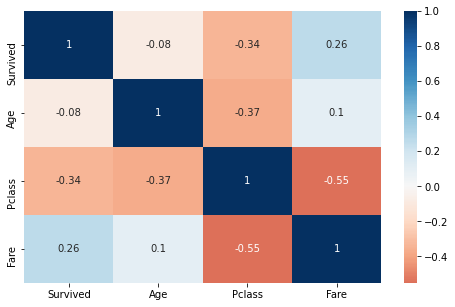

In [61]:
import seaborn as sns
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
sns.heatmap(corr, annot=True, cmap="RdBu", center=0, ax=ax)

<AxesSubplot:>

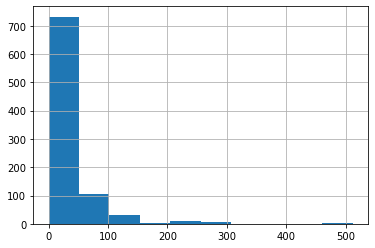

In [62]:
df.Fare.hist()

<AxesSubplot:title={'center':'Age - Fare relationship'}, xlabel='Age', ylabel='Fare'>

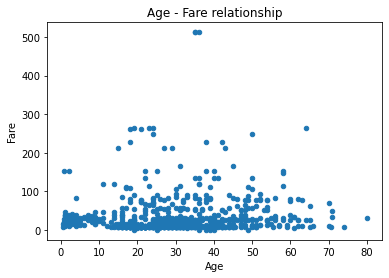

In [50]:
df.plot(x = 'Age', y = 'Fare', kind = 'scatter', title = 'Age - Fare relationship')

In [27]:
df_ohe = pd.get_dummies(df[['Sex']])
df_ohe

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [28]:
df_new = pd.concat([df, df_ohe], axis = 1)
df_new

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1


In [29]:
df_new.drop(['Sex', 'Sex_male'], axis=1, inplace=True)
df_new

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,0


In [30]:
df["Pclass"] = df["Pclass"].astype("category")
new_categories = {1: "upper class", 2: "second class", 3: "third class"}
df.Pclass.cat.rename_categories(new_categories, inplace=True)
df = pd.get_dummies(df[['Pclass']], prefix_sep='_', drop_first=True)
df.head()


,Pclass_second class,Pclass_third class
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [31]:
df_new1 = pd.concat([df_new, df], axis = 1)
df_new1

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Pclass_second class,Pclass_third class
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,1,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,0,0,0


In [32]:
outcome = 'Survived'

In [42]:
predictors = ['Fare', 'Sex_female', 'Pclass_second class', 'Pclass_third class']

In [35]:
y = df_new1[outcome]

In [43]:
X = df_new1[predictors]

In [44]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(X, y)

LogisticRegression(C=1e+42, solver='liblinear')

In [46]:
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coefficient': logit_reg.coef_[0]}, index=X.columns).transpose())
print()

intercept  -0.4774473843396058
                 Fare  Sex_female  Pclass_second class  Pclass_third class
coefficient  0.001818    2.624473            -0.736186           -1.790138



In [48]:
import statsmodels
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess

Xtrain = df_new1[['Fare', 'Sex_female', 'Pclass_second class', 'Pclass_third class']]
ytrain = df_new1[['Survived']]

log_reg = sm.Logit(ytrain, Xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.466112
         Iterations 6


In [49]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      887
Method:                           MLE   Df Model:                            3
Date:                Thu, 22 Apr 2021   Pseudo R-squ.:                  0.3000
Time:                        18:23:06   Log-Likelihood:                -415.31
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 7.329e-77
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Fare                   -0.0011      0.002     -0.713      0.476      -0.004       0.002
Sex_female              2.5911      0.186     13.931      0.000       2.227       2.956
Pclass_second cl

In [52]:
df_new1 = df_new1.drop(['ticket','cabin'], axis=1) 

In [53]:
df_new1 = df_new1.dropna() 

In [56]:
Xtrain = df_new1[['Fare', 'Sex_female', 'Age', 'Pclass_second class', 'Pclass_third class']]
ytrain = df_new1[['Survived']]

log_reg = sm.Logit(ytrain, Xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.459974
         Iterations 6


In [57]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      707
Method:                           MLE   Df Model:                            4
Date:                Thu, 22 Apr 2021   Pseudo R-squ.:                  0.3183
Time:                        18:40:53   Log-Likelihood:                -327.50
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 5.778e-65
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Fare                    0.0042      0.002      1.948      0.051   -2.61e-05       0.008
Sex_female              2.5470      0.204     12.485      0.000       2.147       2.947
Age             